## Pengujian teory darwin (seleksi alam species geospiza fortis di Galapagos Islands)
pada project kali ini saya akan melakukan analisis terhadap perubahan species burung di sebuah pulau terpencil di Galapagos Islands, pulau ini dipilih oleh karena tidak adanya interaksi habitat dengan manusia dan faktor luar lain sehingga proses seleksi alam terjadi hanya pada faktor yang bisa diamati dari pulau tersebut, data diambil dari tahun 1975 sampai 2012 oleh kelompok ilmuan dari princeton university bernama peter and rosemary grant.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Cleaning

In [25]:
# pembacaan data
df1 = pd.read_csv('finch_beaks_1975.csv')
df2 = pd.read_csv('finch_beaks_2012.csv')

In [26]:
# rubah nama kolum sebelum kita gabung datanya
df1.columns = ['band', 'species', 'blength', 'bdepth']

In [27]:
df1[df1.species == 'scandens' ].head()

,band,species,blength,bdepth
316,302,scandens,13.9,8.4
317,304,scandens,14.0,8.8
318,306,scandens,12.9,8.4
319,310,scandens,13.5,8.0
320,317,scandens,12.9,7.9


In [5]:
df2[df2.species == 'scandens' ].head()

,band,species,blength,bdepth
121,19026,scandens,14.3,9.4
122,19028,scandens,12.5,8.9
123,19029,scandens,13.7,9.5
124,19094,scandens,13.8,11.0
125,19122,scandens,12.0,8.7


In [30]:
df2['year'] = 2012
df1['year'] = 1975

In [31]:
#kita akan buang data yang tidak kitabutuhkan
df1.drop(['band', 'blength'], axis=1, inplace=True)
df2.drop(['band', 'blength'], axis=1, inplace=True)


In [32]:
fortis = pd.concat([df1[df1.species == 'scandens' ], df2[df2.species == 'scandens' ]], sort=False, ignore_index=True)

In [33]:
fortis.head()

,species,bdepth,year
0,scandens,8.4,1975
1,scandens,8.8,1975
2,scandens,8.4,1975
3,scandens,8.0,1975
4,scandens,7.9,1975


## EDA ( exploratory data analysis) dari panjang paruh burung geospiza fortis 


kita akan melihat bagaimana panjang paruh (jarak, atas ke bawah, paruh tertutup) spesies Geospiza scandens telah berubah dari waktu ke waktu.

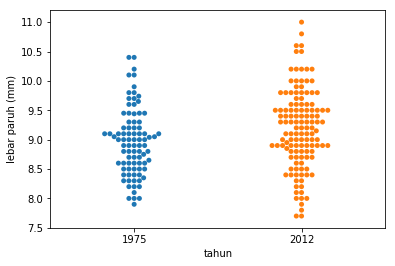

In [34]:
# buat tabel beeswarm dengan seaborn
_ = sns.swarmplot('year', 'bdepth', data=fortis)

_ = plt.xlabel('tahun')
_ = plt.ylabel('lebar paruh (mm)')

plt.show()

Agak sulit untuk melihat apakah ada perbedaan yang jelas antara data tahun 1975 dan 2012. akan tetapi, terlihat bahwa rata-rata data 2012 mungkin sedikit lebih tinggi, dan mungkin memiliki varian yang lebih besar.

## Empirical Comulative Distribution Function (ECDF) dari panjang paruh

Meskipun sudah digunkan beswam plot, kita tahu bahwa menggunakan ECDF seringkali lebih baik ketika melakukan EDA. kita akan melihat Plot ECDF untuk pengukuran panjang paruh 1975 dan 2012.

In [99]:
# kita pisah data sebelum melakukan ecdf
data1975 = df1[df1.species == 'scandens'][['bdepth']].sort_values('bdepth')
data2012 = df2[df2.species == 'scandens'][['bdepth']].sort_values('bdepth')

In [100]:
data1975.reset_index(drop=True)
data2012.reset_index(drop=True)

,bdepth
0,7.7
1,7.7
2,7.8
3,7.9
4,8.0
5,8.0
6,8.0
7,8.1
8,8.1
9,8.2


In [93]:
# kita akan biat fungsi ECDF

def ecdf(data):
    """melakukan perhitungan ecdf untuk 1-d array."""
    # panjang data: n
    n = len(data)

    # data pada sumbu x
    x= np.sort(data)

    # data pada sumbu y
    y= np.arange(1, n+1) / n

    return x, y

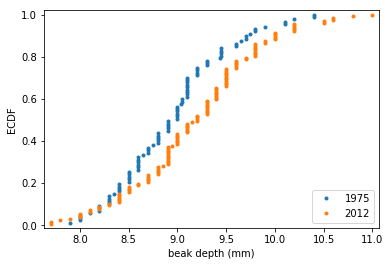

In [103]:
# hitung ECDFs
x_1975, y_1975 = ecdf(data1975)
x_2012, y_2012 = ecdf(data2012)

# Plot ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# label dan legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# tampilkan plot
plt.show()

Perbedaannya jauh lebih jelas dalam ECDF. nilai mean data 2012 lebih besar, dengan varian yang juga tampak lebih besar.
